# 주제 : 오늘 밤 유럽 축구, 어디가 이길까? 데이터로 분석하고 내기를 이겨보자!
----------

## 데이터 소개
    - 이번 주제는 European Soccer Database 데이터셋을 사용합니다.
    
    - 다음 1개의 sqlite 데이터베이스를 사용합니다.
    database.sqlite

    - 데이터 베이스 내 총 7개의 Table을 사용합니다.
    Country: 국가 정보
    League: 리그 정보
    Match: 경기 정보 (주 데이터셋)
    Player: 플레이어 정보
    Player_Attributes: 플레이어의 특성
    Team: 팀 정보
    Team_Attributes: 팀의 특성
    
- 데이터 출처: https://www.kaggle.com/hugomathien/soccer

## 최종 목표
    - SQL 데이터셋에서 테이블을 읽어들이는 방법 이해
    - 여러개의 테이블을 통합하는 방법 이해
    - 수 많은 데이터로부터 관심있는 데이터를 식별
    - 학습된 모델로부터 인사이트 습득 방법 이해

## Step 0. 데이터베이스와 SQL

### 데이터베이스란


### SQL과 Query


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] =  'puddinghong'
os.environ['KAGGLE_KEY'] = 

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d hugomathien/soccer
!unzip *.zip

 70% 23.0M/32.7M [00:00<00:00, 99.5MB/s]
100% 32.7M/32.7M [00:00<00:00, 103MB/s] 
Archive:  soccer.zip
  inflating: database.sqlite         


### 문제 3. sqlite3와 Pandas로 sqlite 데이터베이스 읽어들이기


In [5]:
import sqlite3

In [6]:
# sqlite3.connect()와 pd.read_sql_query()로 csv파일 읽어들이기
conn = sqlite3.connect('database.sqlite')

In [7]:
df_country = pd.read_sql_query('SELECT * FROM Country', conn)
df_league = pd.read_sql_query('SELECT * FROM League', conn)
df_match = pd.read_sql_query('SELECT * FROM Match', conn)
df_player = pd.read_sql_query('SELECT * FROM Player', conn)
df_player_att = pd.read_sql_query('SELECT * FROM Player_Attributes', conn)
df_team = pd.read_sql_query('SELECT * FROM Team', conn)
df_team_att = pd.read_sql_query('SELECT * FROM Team_Attributes', conn)

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임의 구조 파악하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [ ]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [ ]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [ ]:
df_player_att

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [ ]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [ ]:
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


### 문제 5. 데이터프레임간의 관계 파악하기


In [ ]:
# 데이터프레임 간 중복되는 Column이 있는지 확인하고 유용한 Column 식별하기
# Hint) unique()로 값을 비교하거나, map() 등을 활용하여 Column 관계를 확인

플레이어 정보를 확인해보자

In [9]:
df_player_att.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


여기서 player_api_id는 선수의 경기 일정에 따라 중복 값(횟수)가 달라진다.   
각 선수의 경기 횟수를 확인해보자

In [11]:
df_player_att['player_api_id'].value_counts()

41269     56
210278    56
42116     55
26472     54
179795    53
          ..
33688      2
470720     2
37366      2
9144       2
240561     2
Name: player_api_id, Length: 11060, dtype: int64

각 선수는 많게는 56번 적게는 2번 경기에 출전하였음을 알 수 있다.

df_player_att의 플레이어 정보와 df_match의 플레이어 정보의 관계를 확인해보자.   


In [12]:
# away player :  원정선수
df_match['away_player_1']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
25974    462944.0
25975     42276.0
25976     10637.0
25977    274776.0
25978    156175.0
Name: away_player_1, Length: 25979, dtype: float64

away_player_1은 Nan값도 있고 데이터 타입이 float이다.   
Nan값은 제거하고 데이터형은 int로 바꿔보자.

In [21]:
df_match['away_player_1'].dropna().apply(int)

144       34480
145       37937
146       38252
147       36835
148      104378
          ...  
25974    462944
25975     42276
25976     10637
25977    274776
25978    156175
Name: away_player_1, Length: 24745, dtype: int64

이제 away_player_1의 id를 player_api_id로 바꿔서 매치해보자.   
먼저 df_player_att의 overall_rating의 평균을 player_api_id를 그룹화하여 구해보자.   



In [24]:
df_match['away_player_1'].dropna().apply(int).map(df_player_att.groupby('player_api_id').mean()['overall_rating']).isna().sum()

0

위 코드에서 map은 시리즈를 받게 된다.   
map이 받은 시리즈가 매핑하는 테이블이 된다.

결측치를 확인했을 때 0이 나왔다는 뜻은 away_player_1에 있는 id값이 player_api_id에 전부 있다는 뜻이다.

팀 정보도 확인해보자.   
overall_rating대신 builUpPlaySpeed를 썼다.

In [25]:
df_team_att['team_api_id'].value_counts()

8588      6
8640      6
9864      6
8661      6
8456      6
         ..
8262      1
6351      1
8242      1
274581    1
6631      1
Name: team_api_id, Length: 288, dtype: int64

In [26]:
df_match['home_team_api_id']

0         9987
1        10000
2         9984
3         9991
4         7947
         ...  
25974    10190
25975     9824
25976     9956
25977     7896
25978    10192
Name: home_team_api_id, Length: 25979, dtype: int64

In [29]:
df_match['home_team_api_id'].isna().sum()

0

home_team_api_id는 Nan값도 없고 int형이므로 dropna와 apply할 필요 x

In [28]:
df_match['home_team_api_id'].map(df_team_att.groupby('team_api_id').mean()['buildUpPlaySpeed']).isna().sum()

178

home_team_api_id에 매핑되지 않은 team_api_id가 178개 존재함. (df_team_att가 값이 부족한 것임)

### 문제 6. 선수 특성 사이의 상관성 파악하기

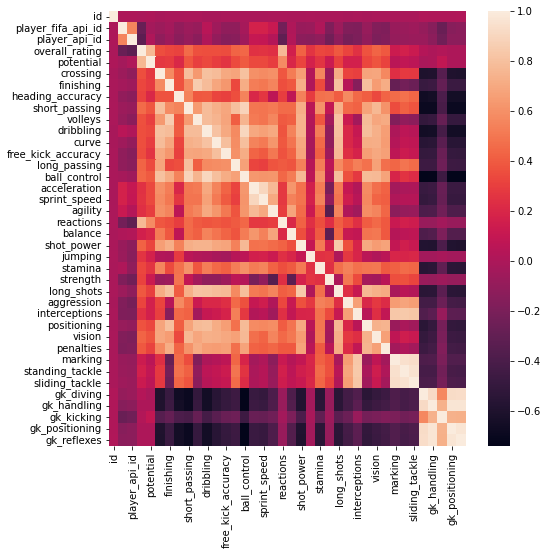

In [33]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
plt.figure(figsize =(8,8))
sns.heatmap(df_player_att.corr())

위 heatmap에서 overall_rating와 다른 요소 간의 상관성을 확인해보자.   
id는 관계 없으므로 drop시킨다.

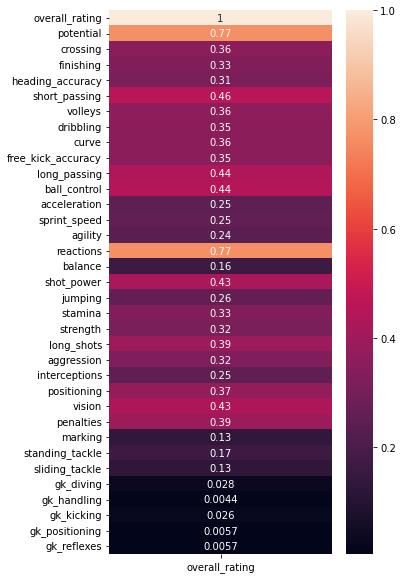

In [38]:
# annot = True 로 상관성을 수치로 나타낸다.
plt.figure(figsize =(5,10))
sns.heatmap(df_player_att.drop(['id','player_fifa_api_id','player_api_id'], axis = 1).corr()[['overall_rating']], annot = True)

overall_rating에 영향을 주는 요소로는   
potential, reactions 가 가장 큰 영향을 주고 그 다음으로는   
short_passing, long_passing, ball_control, shot_power, vision 등이 있다.

골키퍼와 관련된 요소(gk_...)는 골키퍼와만 관련이 있어 전체적으로 봤을 때의 상관도는 낮게 나온다.

### 문제 7. 매치 데이터프레임에 팀 특성 데이터프레임 통합하기


In [ ]:
# DataFrame의 map() 메소드를 활용하여 데이터프레임 통합하기

team_api_id를 기준으로 묶어서 통합해야 한다.   
먼저 df_team_att의 컬럼들을 확인해보자.

In [41]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

buildUpPlayDribbling은 결측치가 많으므로 drop해야하고,   전체 컬럼은 object형과 int, float형이 섞여있다.

먼저 buildUpPlayDribbling을 drop한다.

In [43]:
df_team_att.drop('buildUpPlayDribbling', axis = 1, inplace = True)

In [45]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

team_api_id로 묶을 때 수치형은 평균을 사용하고 범주형(object)은 최빈값을 사용하자.   
먼저 최빈값을 구하는 함수를 생성한다.

In [49]:
def most(x) :      # x에 시리즈 전달
  return x.value_counts().index[0]      #  시리즈에서 value_counts해서 첫번째(최빈) 값 반환

위 코드에서 index[0] 부분은 아래 참조    

In [46]:
df_team_att['buildUpPlaySpeedClass'].value_counts()

Balanced    1184
Fast         172
Slow         102
Name: buildUpPlaySpeedClass, dtype: int64

이제 team_ap_id를 기준으로 통합해보자.

In [47]:
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [52]:
team_map = df_team_att.groupby('team_api_id').aggregate(
    {
        'buildUpPlaySpeed' : 'mean',
       'buildUpPlaySpeedClass' : most,
       'buildUpPlayDribblingClass' : most,
       'buildUpPlayPassing' : 'mean',
       'buildUpPlayPassingClass' : most,
       'buildUpPlayPositioningClass' : most,
       'chanceCreationPassing' : 'mean',
       'chanceCreationPassingClass' : most,
       'chanceCreationCrossing' : 'mean',
       'chanceCreationCrossingClass' : most,
       'chanceCreationShooting' : 'mean',
       'chanceCreationShootingClass' : most,
       'chanceCreationPositioningClass' : most,
       'defencePressure' : 'mean',
       'defencePressureClass' : most,
       'defenceAggression' : 'mean',
       'defenceAggressionClass' : most,
       'defenceTeamWidth' : 'mean',
       'defenceTeamWidthClass' : most,
       'defenceDefenderLineClass' : most
    }
)

In [53]:
team_map

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,,,,,,,,,,
1601,47.333333,Balanced,Little,46.166667,Mixed,Organised,55.500000,Normal,60.333333,Normal,53.500000,Normal,Organised,47.166667,Medium,47.333333,Press,49.333333,Normal,Cover
1773,52.000000,Balanced,Little,50.000000,Mixed,Organised,50.000000,Normal,53.000000,Normal,54.000000,Normal,Organised,43.000000,Medium,44.000000,Press,50.000000,Normal,Cover
1957,47.166667,Balanced,Little,52.666667,Mixed,Organised,50.833333,Normal,36.333333,Normal,67.000000,Lots,Organised,49.333333,Medium,56.333333,Press,53.666667,Normal,Cover
2033,49.000000,Balanced,Little,48.400000,Mixed,Organised,51.800000,Normal,44.200000,Normal,48.200000,Normal,Free Form,42.200000,Medium,33.800000,Contain,45.400000,Normal,Cover
2182,60.333333,Balanced,Little,49.000000,Mixed,Organised,56.666667,Normal,57.333333,Normal,68.000000,Lots,Organised,51.666667,Medium,48.500000,Press,54.500000,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,52.833333,Balanced,Little,53.666667,Mixed,Organised,50.333333,Normal,59.166667,Lots,50.333333,Normal,Organised,45.500000,Medium,51.166667,Press,52.666667,Normal,Cover
108893,43.166667,Balanced,Little,53.166667,Mixed,Organised,46.000000,Normal,38.333333,Normal,39.500000,Normal,Organised,38.333333,Medium,46.000000,Press,46.333333,Normal,Cover
158085,67.000000,Fast,Normal,39.000000,Mixed,Organised,55.000000,Normal,59.000000,Normal,46.000000,Normal,Organised,36.000000,Medium,38.000000,Press,37.000000,Normal,Cover


team_api_id를 기준으로 데이터가 묶였으므로 df_match에 통합시킬 수 있다.   
df_match에서 home_team_goal과 away_team_goal을 copy한 새 데이터 프레임을 만들고   
여기에 team_map을 연결시켜보

In [54]:
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [ ]:
for team in ['home_team_', 'away_team_'] :


### 문제 8. 홈과 어웨이의 골 수를 승-무-패 범주로 변환하기

In [ ]:
# 홈과 어웨이의 골 수를 범주형 데이터로 변환하기 (0: 홈팀 승, 1: 무승부, 2: 어웨이팀 승)



df['matchResult'] = 

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 9. get_dummies를 이용하여 범주형 데이터 전처리하기

### 문제 10. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = 
X_cat =
X = 
y = df_match['matchResult']

### 문제 11. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

## Step 4. Classification 모델 학습하기


### 문제 12. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = 




### 문제 13. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 




### 문제 14. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = 




### 문제 15. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 




## Step5 모델 학습 결과 심화 분석하기


### 문제 16. Logistic Regression 모델 계수로 상관성 파악하기

In [ ]:
# Logistic Regression 모델의 coef_ 속성을 plot하기





### 문제 17. XGBoost 모델로 특징의 중요도 확인하기

In [ ]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기





## Step6 모델 성능 개선하기


### 문제 18. 매치 데이터프레임에 선수 특성 데이터프레임 통합하기

In [ ]:
# 선수 특성 중 유의미한 정보를 매치 데이터프레임에 통합하기





### 문제 19. 모델 재학습하여 평가하기